Train the model and also apply correction by scaling

In [ ]:
%run train.py

ECDF plot in Figure 1

In [ ]:
%run plot_error_ecdf.py

KDE plot in Figure 2

In [ ]:
%run plot_error_kde.py

Bootstrap (Table 1)

In [ ]:
# Running bootstrap can take ~10 minutes.
# The results are cached in Data/boot_coeffs_pose=True.npy
%run run_bootstrap.py

In [ ]:
# This script creates a LaTeX table of bootstrap confidence intervals (Report/boot_table0.tex)
# using the cached bootstrap results.
# In the report we formatted the table manually.
%run bootstrap_ci.py

Cross validation (Figures 3 & 4)

In [18]:
# Running the CV experiments can take ~40 minutes.
# The results are cached in Data/cv_k_out_detailed.csv and Data/loo_detailed_points.csv
# You can also directly run the next cell to produce the plots.
import pandas as pd
from util import load_data
from cross_validation import run_comprehensive_cross_validation, run_leave_one_out_analysis
from constants import LightingCondition

import random
random.seed(0)

df_daylight1 = load_data("Data/daylight1.json")
df_daylight1["lighting_condition"] = LightingCondition.DAYLIGHT.value
df_daylight2 = load_data("Data/daylight2.json")
df_daylight2["lighting_condition"] = LightingCondition.DAYLIGHT.value
df_raw = pd.concat([df_daylight1, df_daylight2], ignore_index=True)

# Leave-k-out
run_comprehensive_cross_validation(df_raw)
# Leave-one-out
run_leave_one_out_analysis(df_raw)

COMPREHENSIVE CROSS-VALIDATION ANALYSIS


1. K-COLOR-OUT CROSS-VALIDATION
--------------------------------------------------


CV (k=1):   0%|          | 0/400 [00:00<?, ?it/s]               

CV (k=20): 100%|██████████| 400/400 [04:51<00:00,  1.37it/s]


Figure saved to: k_out_analysis.png


2. TARGETED CROSS-VALIDATION
--------------------------------------------------
TARGETED CROSS-VALIDATION

Test Sets Dictionary:
  Red-ish: [7, 9, 12, 15, 16]
  Green-ish: [4, 6, 11, 14]
  Blue-ish: [3, 5, 6, 8, 13, 18]
  Neutral: [19, 20, 21, 22, 23, 24]
  Top_5_R: [12, 19, 16, 7, 20]
  Top_5_G: [19, 11, 20, 6, 16]
  Top_5_B: [19, 20, 6, 21, 5]

Iteration for Test Set: Red-ish
Valid test samples: [7, 9, 12, 15, 16]
Training samples: 19 unique, 380 rows
Test samples: 5 unique, 100 rows

Results for 'Red-ish':
  Average MSE: 266.1755
  Training size: 380 rows
  Test size: 100 rows

Iteration for Test Set: Green-ish
Valid test samples: [4, 6, 11, 14]
Training samples: 20 unique, 400 rows
Test samples: 4 unique, 80 rows

Results for 'Green-ish':
  Average MSE: 330.7708
  Training size: 400 rows
  Test size: 80 rows

Iteration for Test Set: Blue-ish
Valid test samples: [3, 5, 6, 8, 13, 18]
Training samples: 18 unique, 360 rows
Test samples: 6 unique, 1

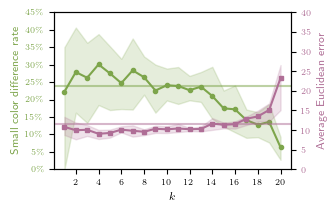

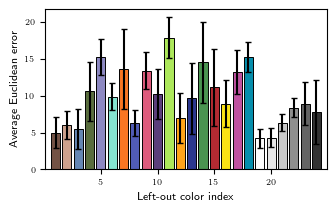

<Figure size 640x480 with 0 Axes>

In [19]:
%run plot_cv.py